Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: TkAgg


c:\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['style']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


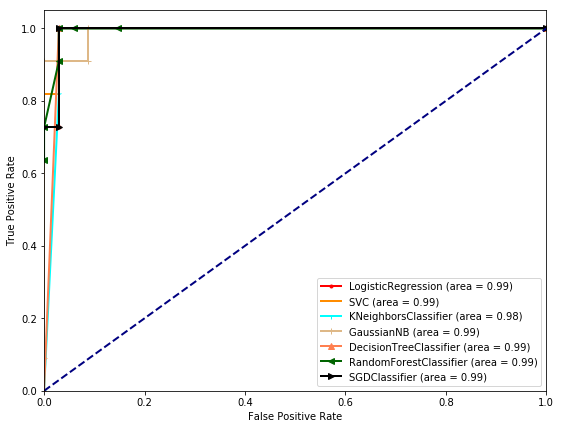

In [33]:
#ROC曲线绘制 
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
%pylab inline
%matplotlib

from sklearn import svm, datasets,preprocessing
from sklearn.metrics import roc_curve, auc  #计算roc和auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.multiclass import OneVsRestClassifier
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

##使标签二分化
y = preprocessing.label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#加入噪音
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
 
#分离数据集
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=.3,random_state=0)

MLA = [
    LogisticRegression(),
    svm.SVC(probability=True),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(loss = "log",max_iter=100)
      ]

lw = 2
#plt.figure(figsize=(7,7))
plt.rcParams['figure.figsize'] = (9.0, 7.0)
colorlist = cycle(['red', 'darkorange','aqua','burlywood','coral','darkgreen','black'])
typelist = cycle(['.',',','1','+','^','<','>'])
for alg, color,style in zip(MLA, colorlist,typelist):
    classifier = OneVsRestClassifier(alg)
    classifier.fit(x_train, y_train)
    y_proba = classifier.predict_proba(x_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #计算ROC和AUC
    fpr["micro"], tpr["micro"], lr_threshold = roc_curve(y_test.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr[2], tpr[2], color=color,marker=style,
         lw=lw, label='{0} (area = {1:0.2f})'
             ''.format(alg.__class__.__name__, roc_auc[2])) #假正率为横坐标，真正率为纵坐标做曲线

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [35]:
titanic_df

3

In [ ]:
#ROC曲线绘制
from itertools import cycle
from sklearn import svm, datasets,preprocessing
from sklearn.metrics import roc_curve, auc  #计算roc和auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.multiclass import OneVsRestClassifier

#选取参与训练和预测的特征与目标
features = titanic_df[['Pclass', 'Age', 'FamilySize', 'Fare', 'Cabin_cat', 'Sex_female', 'Sex_male', 'Embarked_cat']]
target = titanic_df['Survived']

#分离数据集
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=33)

MLA = [
    LogisticRegression(),
    svm.SVC(probability=True),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(loss = "log",max_iter=100,random_state=0)
      ]

lw = 2
plt.rcParams['figure.figsize'] = (9.0, 7.0)
colorlist = cycle(['red', 'darkorange','aqua','burlywood','coral','darkgreen','black'])
typelist = cycle(['.',',','1','+','^','<','>'])
for alg, color,style in zip(MLA, colorlist,typelist):
    classifier = OneVsRestClassifier(alg)
    classifier.fit(x_train, y_train)
    y_proba = classifier.predict_proba(x_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color,marker=style,
         lw=lw, label='{0} (area = {1:0.2f})'
             ''.format(alg.__class__.__name__, roc_auc)) #假正率为横坐标，真正率为纵坐标做曲线

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
